In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [3]:
data1 = pd.read_csv("Rattaringlus2019.06--2019.12.csv")
data2 = pd.read_csv("Rattaringlus2019.12--2020.07.csv")

In [5]:
data1.head()

,unlockedat,unlockedattime,lockedat,lockedattime,length,startstationname,endstationname
0,2019-06-01,09:37:57,2019-06-01,10:18:07,0.04,Warehouse,Warehouse
1,2019-06-01,09:39:42,2019-06-01,10:13:56,0.07,Undetermined,Warehouse
2,2019-06-01,09:41:28,2019-06-01,10:19:49,0.03,Undetermined,Warehouse
3,2019-06-01,09:48:09,2019-06-01,10:22:08,0.03,Warehouse,Warehouse
4,2019-06-01,10:02:54,2019-06-01,10:05:17,0.02,Warehouse,Warehouse


In [6]:
data2.head()

,unlockedat,unlockedattime,lockedat,lockedattime,length,startstationname,endstationname
0,2019-12-14,15:25:43,2019-12-14,15:33:21,1.76,Kalda tee,Tarmeko
1,2019-12-14,15:26:21,2019-12-14,15:47:08,3.75,Annelinna keskus,Annelinna keskus
2,2019-12-14,15:27:35,2019-12-14,15:35:19,1.25,Sõpruse sild,Soola
3,2019-12-14,15:31:17,2019-12-14,15:46:10,2.79,Lõunakeskus,Aparaaditehas
4,2019-12-14,15:34:48,2019-12-14,15:41:17,1.80,Torni,Veeriku


In [14]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
# you can change the default style of plots - google for more choices
plt.style.use("ggplot")
test = pd.read_csv("testike.csv")

In [15]:
test['lockedattime'] = test['lockedattime'].astype(str).str[:8]
test['unlockedattime'] = test['unlockedattime'].astype(str).str[:8]
test['unlocked'] = pd.to_datetime(test['unlockedattime'] + ' ' + test['unlockedat'])
test['locked'] = pd.to_datetime(test['lockedattime'] + ' ' + test['lockedat'])
puhas = test.drop(columns=['unlockedat', 'unlockedattime', 'lockedat', 'lockedattime'])

In [16]:
for i, startstationname in enumerate(puhas.startstationname):
    x = puhas['startstationname'][i]
    y = puhas['endstationname'][i]
    z = puhas['length'][i]
    
    if x == '-- Määramata --':
        puhas.at[i, 'startstationname'] = 'Undetermined'
        x = puhas['startstationname'][i]
    if y == '-- Määramata --':
        puhas.at[i, 'endstationname'] = 'Undetermined'
        y = puhas['endstationname'][i]
    if x == 'Undetermined':
        if y != 'Undetermined':
            if z < 0.1:
                puhas.at[i, 'startstationname'] = y

In [9]:
vol1 = puhas[['startstationname', 'unlocked']]
vol1['minek'] = 1 #kui 1 siis unlocked
vol2 = puhas[['endstationname', 'locked']]
vol2['minek'] = 0 
vol1.rename(columns={'startstationname':'station', 'unlocked':'time'}, inplace=True)
vol2.rename(columns={'endstationname':'station', 'locked':'time'}, inplace=True)
result = pd.concat([vol1, vol2])
sorteeritud = result.sort_values('time')
sorteeritud = sorteeritud.reset_index(drop=True)
sorteeritud

<ipython-input-9-982bb9957b1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol1['minek'] = 1 #kui 1 siis unlocked
<ipython-input-9-982bb9957b1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol2['minek'] = 0
C:\Users\Elina Meier\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

,station,time,minek
0,Warehouse,2019-06-01 10:32:20,1
1,Warehouse,2019-06-02 02:00:00,0
2,TÜ raamatukogu,2019-12-14 15:10:11,1
3,Vabadussild,2019-12-14 15:11:30,1
4,Vanemuise park,2019-12-14 15:12:36,1
5,Kuu,2019-12-14 15:15:24,1
6,Annelinna keskus,2019-12-14 15:15:42,1
7,Rahu,2019-12-14 15:16:12,1
8,Turusild,2019-12-14 15:16:35,1
9,Ülejõe park,2019-12-14 15:16:49,1


In [17]:
t = sorteeritud.loc[(sorteeritud['time'] >= '2019 12 14') ]
t = t.reset_index(drop=True)
t

,station,time,minek
0,TÜ raamatukogu,2019-12-14 15:10:11,1
1,Vabadussild,2019-12-14 15:11:30,1
2,Vanemuise park,2019-12-14 15:12:36,1
3,Kuu,2019-12-14 15:15:24,1
4,Annelinna keskus,2019-12-14 15:15:42,1
5,Rahu,2019-12-14 15:16:12,1
6,Turusild,2019-12-14 15:16:35,1
7,Ülejõe park,2019-12-14 15:16:49,1
8,Aleksandri,2019-12-14 15:17:33,1
9,Kaunase puiestee,2019-12-14 15:18:31,1


In [13]:
l = np.unique(puhas[['startstationname', 'endstationname']].values)

l

array(['Aleksandri', 'Annelinna keskus', 'ERM', 'Kaunase puiestee',
       'Kopli', 'Kuu', 'Magistri', 'Mõisavahe', 'Pargi', 'Pirogovi plats',
       'Põllu', 'Rahu', 'Raudteejaam', 'Riiamäe', 'Roosi', 'Rüütli',
       'Soola', 'Tamme gümnaasium', 'Tamme staadion', 'Torni', 'Turusild',
       'TÜ raamatukogu', 'Uueturu', 'Vabadussild', 'Vanemuise park',
       'Veeriku', 'Warehouse', 'Ülejõe park'], dtype=object)

In [18]:
tim = pd.Timestamp('2019-12-14T15')
vahemik = pd.to_timedelta("00:15:00")
uus = pd.DataFrame({'start':0} ,index = l)
col = pd.DataFrame({tim:0} ,index = l)

for i, station in enumerate(t.station):
    station = t['station'][i]
    time = t['time'][i]
    minek = t['minek'][i]
    while (abs(tim - time) > vahemik):
        tim += vahemik
        uus[tim] = col
        col = pd.DataFrame({tim:0} ,index = l)
    else:
        if minek == 0:
            col[tim][station] -= 1
        else:
            col[tim][station] += 1
uus

,start,2019-12-14 15:15:00,2019-12-14 15:30:00,2019-12-14 15:45:00,2019-12-14 16:00:00,2019-12-14 16:15:00
Aleksandri,0,0,1,0,0,0
Annelinna keskus,0,0,1,0,0,0
ERM,0,0,0,-1,0,0
Kaunase puiestee,0,0,1,-1,0,0
Kopli,0,0,0,-1,0,0
Kuu,0,0,1,0,0,0
Magistri,0,0,1,0,0,0
Mõisavahe,0,0,-1,-1,-1,0
Pargi,0,0,-1,0,0,0
Pirogovi plats,0,0,0,0,0,0


In [23]:
row = uus.iloc[12]

<AxesSubplot:>

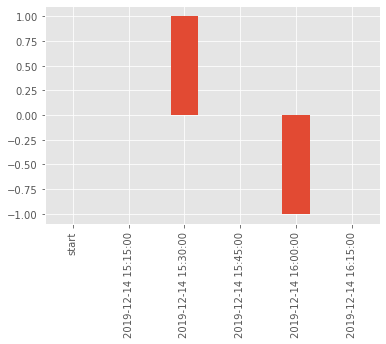

In [27]:
row.plot(kind='bar')